In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

In [2]:

filename="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
 
df=pd.read_csv(filename,sep=",", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# df = df.drop(labels = ['fnlwgt','capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
col = df.columns
for c in col:
    df = df[df[c]!=' ?']
    if all(isinstance(n, str) for n in df[c]):
        df[c] = df[c].str.strip()
races = df['race'].unique()
abbr_races = ['W', 'B', 'API', 'AIE','Oth']
df['race'].replace(races, abbr_races, inplace=True)


In [28]:
edu_mapped = {}
val_map = {}
for index, row in df[['education', 'education-num']].iterrows():
     edu_mapped[row['education-num']] = row['education']
for val in edu_mapped:
    if val in (5, 6, 7, 8):
        edu_mapped[val] = 'HS-dropout'
        val_map['HS-dropout'] = 6
    if val in (3 , 4):
        edu_mapped[val] = 'MidSch'
        val_map['MidSch-dropout'] = 3
    if val == 2:
        edu_mapped[val] = 'PrimSch'

for index, row in df[['education', 'education-num']].iterrows():
    df.at[index,'education'] = edu_mapped[row['education-num']]
    if row['education'] in val_map.keys():
        df.at[index,'education-num'] = val_map[row['education']]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,W,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,W,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,W,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HS-dropout,6,Married-civ-spouse,Handlers-cleaners,Husband,B,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,B,Female,0,0,40,Cuba,<=50K


In [50]:
df_below = df[df['income']=='<=50K']
df_above = df[df['income']=='>50K']
display(df_below)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,W,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,W,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,W,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HS-dropout,6,Married-civ-spouse,Handlers-cleaners,Husband,B,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,B,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,API,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,W,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,W,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,W,Female,0,0,40,United-States,<=50K


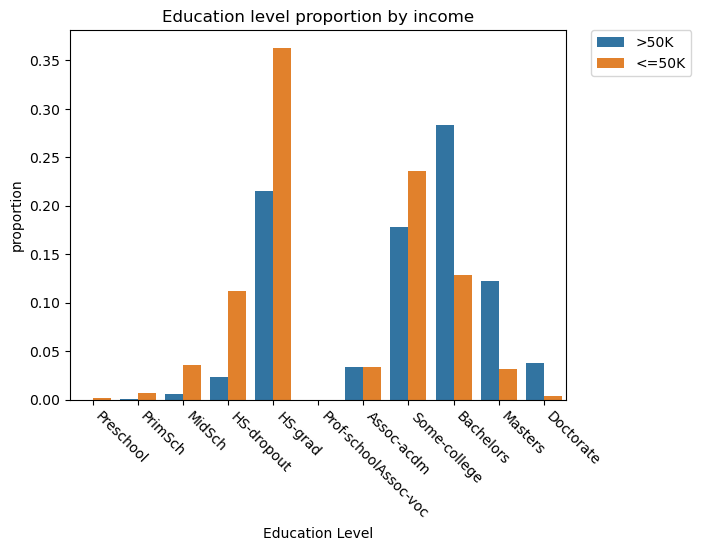

,Education Level,proportion,ds
0,Assoc-acdm,0.034097,>50K
1,Assoc-voc,0.045818,>50K
2,Bachelors,0.283165,>50K
3,Doctorate,0.037294,>50K
4,HS-dropout,0.022909,>50K
5,HS-grad,0.215370,>50K
6,Masters,0.122270,>50K
7,MidSch,0.006260,>50K
8,PrimSch,0.000799,>50K
9,Prof-school,0.054076,>50K


<Figure size 640x480 with 0 Axes>

In [30]:
below_normalizer = len(df_below['education'])
above_normalizer = len(df_above['education'])

edu_above = df_above.reindex(columns=['education','education-num']) 
edu_above = edu_above.groupby('education').count().pipe(lambda x: x/above_normalizer)
edu_above = edu_above.reset_index()
edu_above.rename(columns={'education':'Education Level', 'education-num':'proportion'}, inplace=True)

edu_below = df_below.reindex(columns=['education','education-num']) 
edu_below = edu_below.groupby('education').count().pipe(lambda x: x/below_normalizer)
edu_below = edu_below.reset_index()
edu_below.rename(columns={'education':'Education Level', 'education-num':'proportion'}, inplace=True)

edu_above['ds']='>50K'
edu_below['ds']='<=50K'

edu_df = pd.concat([edu_above, edu_below])

ed_lvl_order = ['Preschool','PrimSch', 'MidSch', 'HS-dropout', 'HS-grad', 'Prof-school' 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

sns.barplot(data=edu_df, x='Education Level', y='proportion', hue='ds', order=ed_lvl_order)

plt.gca().legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.xticks(rotation = 315, ha = 'left')
plt.title('Education level proportion by income')
plt.show()
plt.savefig("Education level proportion by income.png")
display(edu_df)

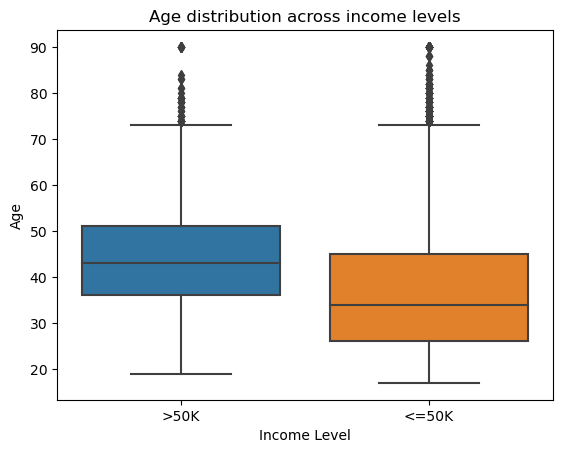

<Figure size 640x480 with 0 Axes>

In [31]:
above_age = list(df_above['age'])
below_age = list(df_below['age'])
age_distr = pd.concat([pd.Series(above_age, name='>50K'), pd.Series(below_age,name='<=50K') ], axis=1)
sns.boxplot(data=age_distr).set(xlabel="Income Level", ylabel='Age')
plt.title('Age distribution across income levels')
plt.show()
plt.savefig("Age distribution across income levels.jpg")

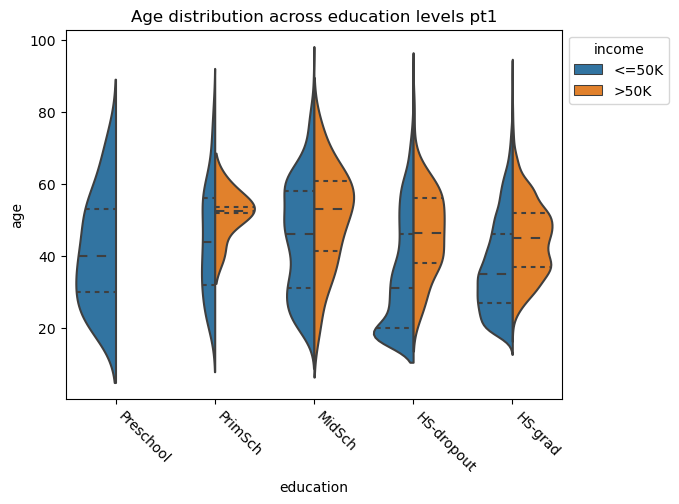

In [73]:
age_edu_data = df[['age','education', 'income'] and df['education-num']<10]
lvl_order = ['Preschool','PrimSch', 'MidSch', 'HS-dropout', 'HS-grad']

ax = sns.violinplot(data=age_edu_data, x='education', order=lvl_order,  y='age', hue='income', split=True, inner="quart", legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 315, ha = 'left')
plt.title("Age distribution across education levels pt1")
plt.savefig("Age distribution across education levels pt1.jpg")
plt.show()

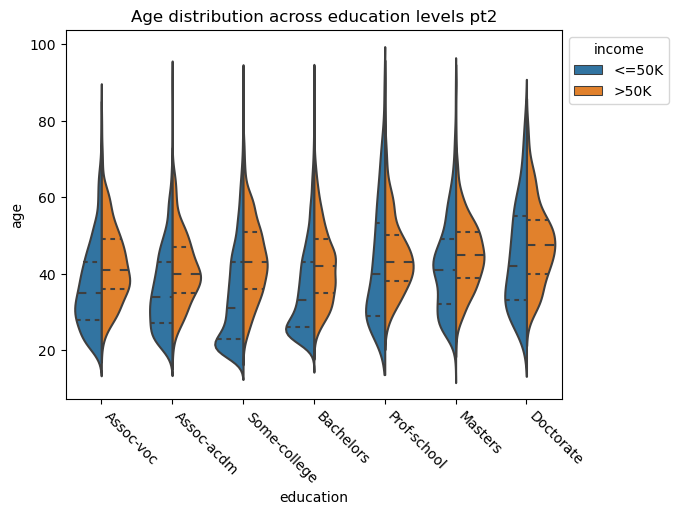

In [76]:
age_edu_data = df[['age','education', 'income'] and df['education-num']>=10]
lvl_order = ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Prof-school', 'Masters', 'Doctorate']
ax = sns.violinplot(data=age_edu_data, x='education', y='age', order=lvl_order, hue='income', split=True, inner="quart", legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 315, ha = 'left')
plt.title("Age distribution across education levels pt2")
plt.savefig("Age distribution across education levels pt2.jpg")
plt.show()

,workclass,count
0,Federal-gov,365
1,Local-gov,609
2,Private,4876
3,Self-emp-inc,600
4,Self-emp-not-inc,714
5,State-gov,344


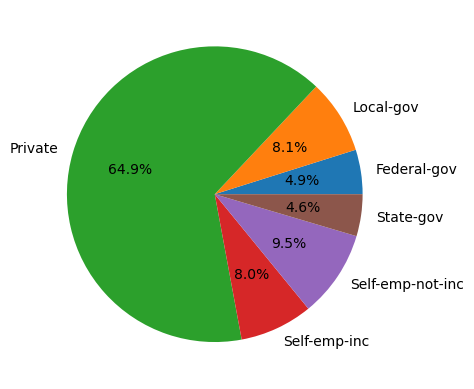

In [34]:
color_palette = sns.color_palette()
fig, ax = plt.subplots()
df_sector_above = df_above[['workclass','occupation']]
df_sector_above = df_sector_above.groupby('workclass').count().rename(columns={"occupation":"count"})
df_sector_above = df_sector_above.reset_index()
display(df_sector_above)
labels = list(df_sector_above.workclass)
sizes = list(df_sector_above['count'])
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color_palette)
plt.show()

,workclass,count
0,Federal-gov,578
1,Local-gov,1458
2,Private,17410
3,Self-emp-inc,474
4,Self-emp-not-inc,1785
5,State-gov,935
6,Without-pay,14


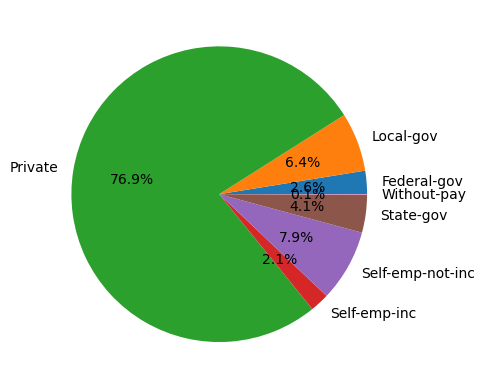

In [35]:
color_palette = sns.color_palette()
fig, ax = plt.subplots()
df_sector_below = df_below[['workclass','occupation']]
df_sector_below = df_sector_below.groupby('workclass').count().rename(columns={"occupation":"count"})
df_sector_below = df_sector_below.reset_index()
display(df_sector_below)
labels = list(df_sector_below.workclass)
sizes = list(df_sector_below['count'])
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color_palette)
plt.show()

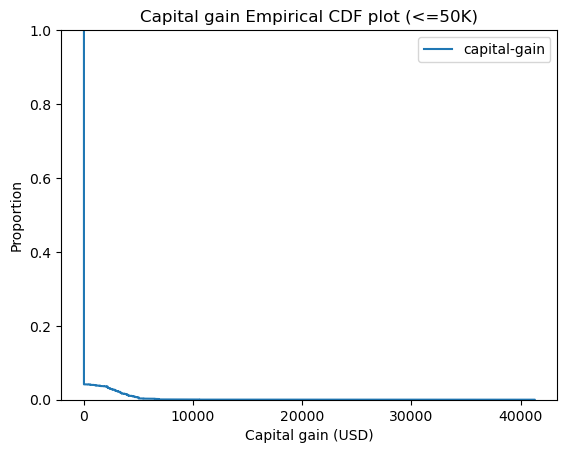

In [36]:
df_cap_gain_below = df_below[['capital-gain']]
ax = sns.ecdfplot(df_cap_gain_below, complementary=True)
ax.set(xlabel='Capital gain (USD)', title = 'Capital gain Empirical CDF plot (<=50K)')
plt.show()

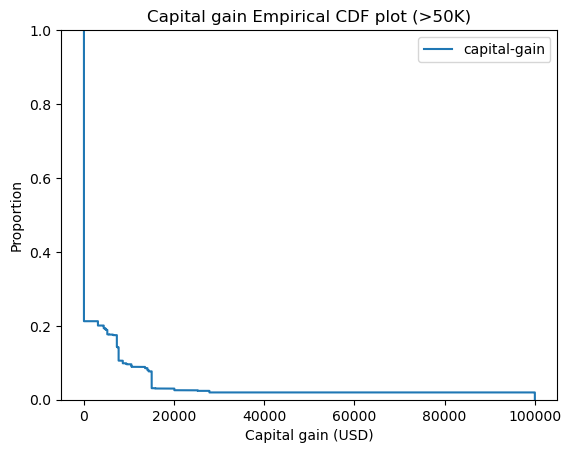

In [37]:
df_cap_gain_above = df_above[['capital-gain']]
ax = sns.ecdfplot(df_cap_gain_above, complementary=True)
ax.set(xlabel='Capital gain (USD)', title = 'Capital gain Empirical CDF plot (>50K)')
plt.show()

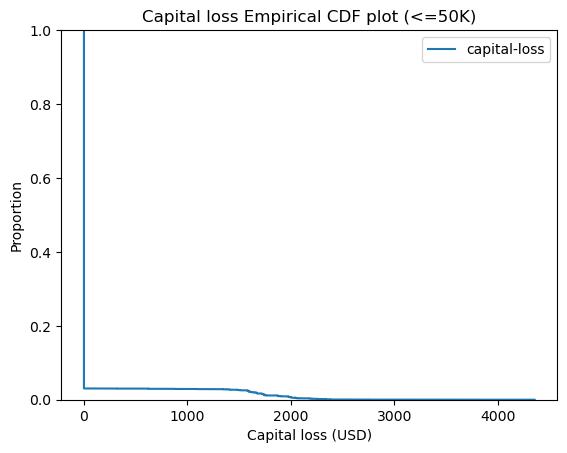

In [38]:
df_cap_loss_below = df_below[['capital-loss']]
ax = sns.ecdfplot(df_cap_loss_below, complementary=True)
ax.set(xlabel='Capital loss (USD)', title = 'Capital loss Empirical CDF plot (<=50K)')
plt.show()

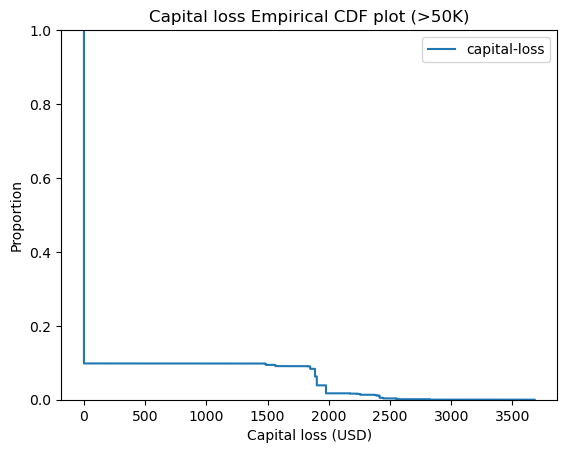

In [39]:
df_cap_loss_above = df_above[['capital-loss']]
ax = sns.ecdfplot(df_cap_loss_above, complementary=True)
ax.set(xlabel='Capital loss (USD)', title = 'Capital loss Empirical CDF plot (>50K)')
plt.show()

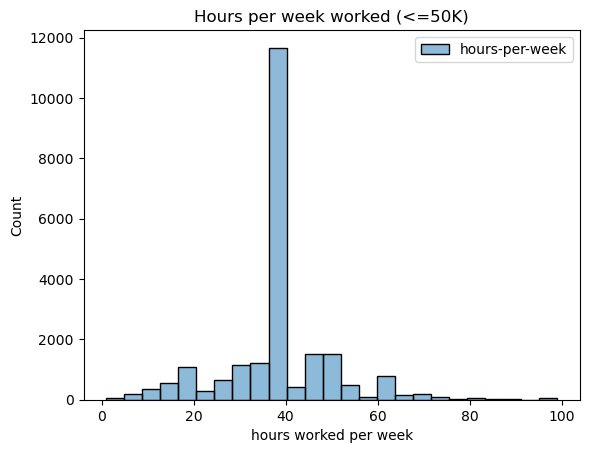

In [40]:
df_hours_below = df_below[['hours-per-week']]
ax = sns.histplot(df_hours_below, bins=25)
ax.set(xlabel='hours worked per week', title='Hours per week worked (<=50K)')
plt.show()

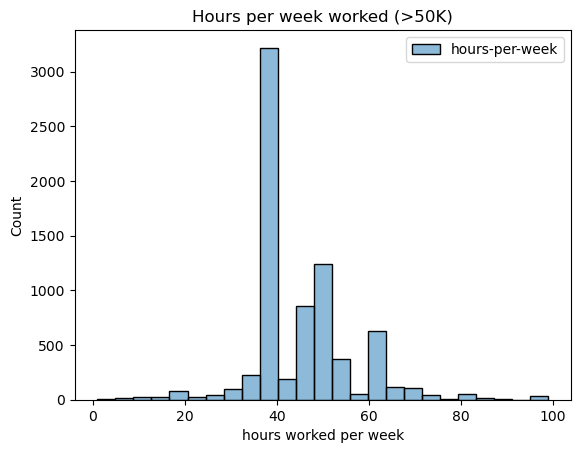

In [41]:
df_hours_above = df_above[['hours-per-week']]
ax = sns.histplot(df_hours_above, bins=25)
ax.set(xlabel='hours worked per week', title='Hours per week worked (>50K)')

plt.show()

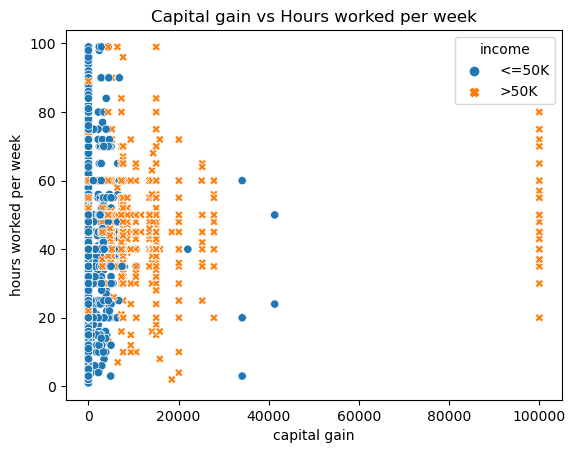

Pearson Correlation:                 hours-per-week  capital-gain
hours-per-week        1.000000      0.080432
capital-gain          0.080432      1.000000


In [42]:
ax = sns.scatterplot(df, y='hours-per-week', x='capital-gain', hue='income', style='income')
ax.set(ylabel='hours worked per week', xlabel='capital gain', title='Capital gain vs Hours worked per week')
plt.show()
corr = df[['hours-per-week', 'capital-gain']].corr(method='pearson')
print("Pearson Correlation: {corr}".format(corr=corr))

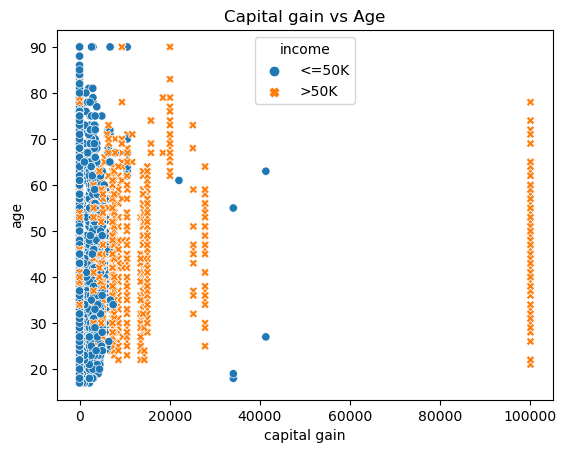

Pearson Correlation:                    age  capital-gain
age           1.000000      0.080154
capital-gain  0.080154      1.000000


In [43]:
ax = sns.scatterplot(df, y='age', x='capital-gain', hue='income', style='income')
ax.set(ylabel='age', xlabel='capital gain', title='Capital gain vs Age')
plt.show()
corr = df[['age', 'capital-gain']].corr(method='pearson')
print("Pearson Correlation: {corr}".format(corr=corr))

,workclass,count
0,Federal-gov,365
1,Local-gov,609
2,Private,4876
3,Self-emp-inc,600
4,Self-emp-not-inc,714
5,State-gov,344


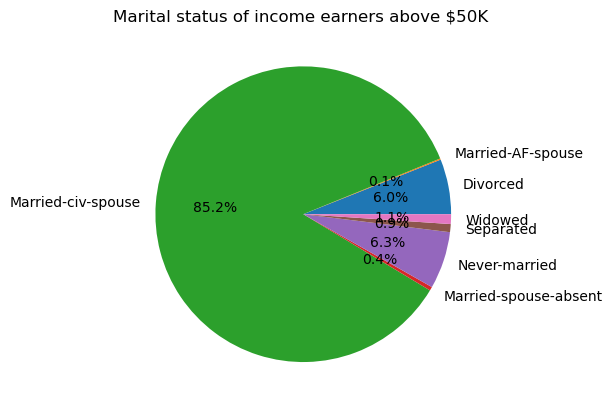

In [44]:
color_palette = sns.color_palette()
fig, ax = plt.subplots()
df_marital_status_above = df_above[['marital-status','occupation']]
df_marital_status_above = df_marital_status_above.groupby('marital-status').count().rename(columns={"occupation":"count"})
df_marital_status_above = df_marital_status_above.reset_index()
display(df_sector_above)
labels = list(df_marital_status_above['marital-status'])
sizes = list(df_marital_status_above['count'])
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color_palette)
plt.title("Marital status of income earners above $50K ")
plt.show()

,workclass,count
0,Federal-gov,578
1,Local-gov,1458
2,Private,17410
3,Self-emp-inc,474
4,Self-emp-not-inc,1785
5,State-gov,935
6,Without-pay,14


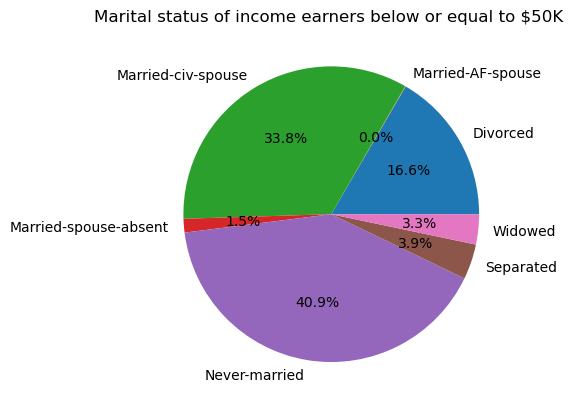

In [45]:
color_palette = sns.color_palette()
fig, ax = plt.subplots()
df_marital_status_below = df_below[['marital-status','occupation']]
df_marital_status_below = df_marital_status_below.groupby('marital-status').count().rename(columns={"occupation":"count"})
df_marital_status_below = df_marital_status_below.reset_index()
display(df_sector_below)
labels = list(df_marital_status_below['marital-status'])
sizes = list(df_marital_status_below['count'])
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color_palette)
plt.title("Marital status of income earners below or equal to $50K ")
plt.show()

In [78]:
fig = px.treemap(df, path=[px.Constant("all"), 'income', 'marital-status'], 
                 values='capital-gain')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(root_color="lightgrey")
fig.show()

C:\Users\jzjac\AppData\Local\Temp\ipykernel_33880\1799894732.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



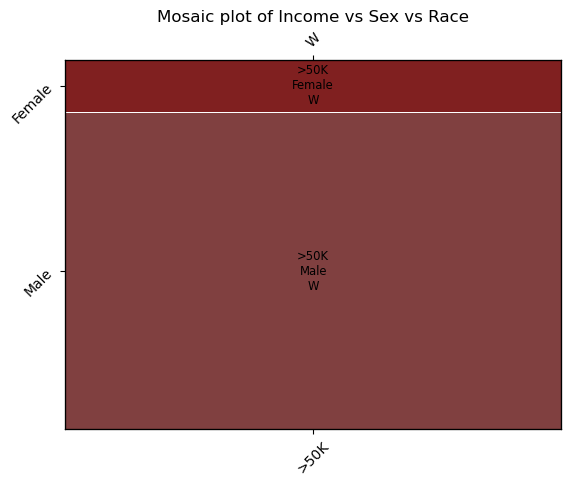

In [47]:
df_white = df_above[df['race']=='W']
mosaic(df_white, [ 'income', 'sex', 'race'], title='Mosaic plot of Income vs Sex vs Race', label_rotation=45)
plt.show()

C:\Users\jzjac\AppData\Local\Temp\ipykernel_1868\1587150755.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



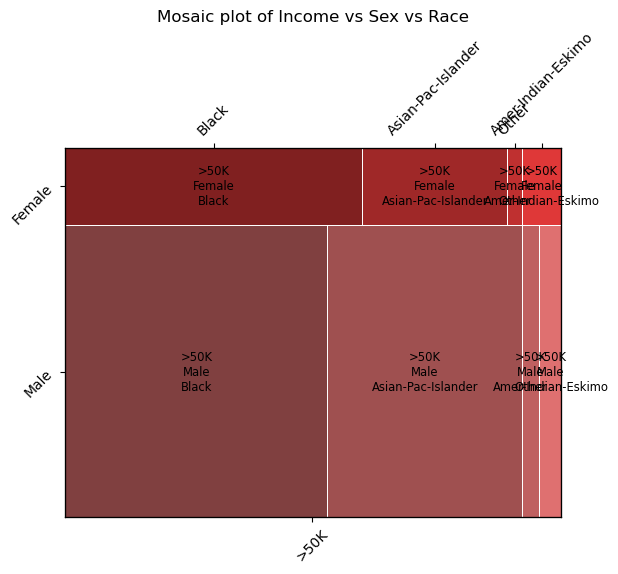

In [393]:
df_non_white = df_above[df['race']!='White']
mosaic(df_non_white, [ 'income', 'sex', 'race'], title='Mosaic plot of Income vs Sex vs Race', label_rotation=45)
plt.show()

C:\Users\jzjac\AppData\Local\Temp\ipykernel_33880\3333757602.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



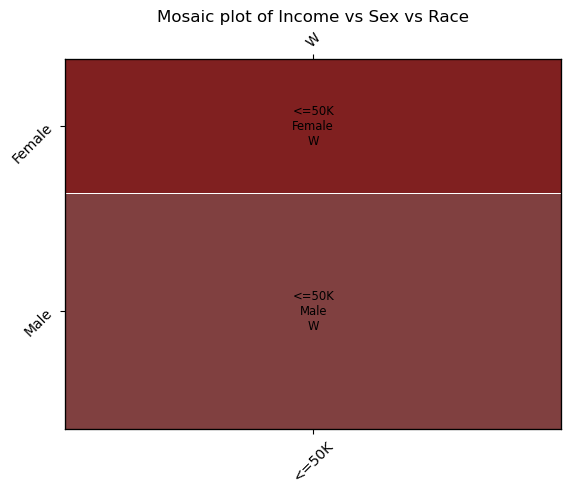

In [48]:
df_white = df_below[df['race']=='W']
mosaic(df_white, [ 'income', 'sex', 'race'], title='Mosaic plot of Income vs Sex vs Race', label_rotation=45)
plt.show()

C:\Users\jzjac\AppData\Local\Temp\ipykernel_33880\2112468729.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



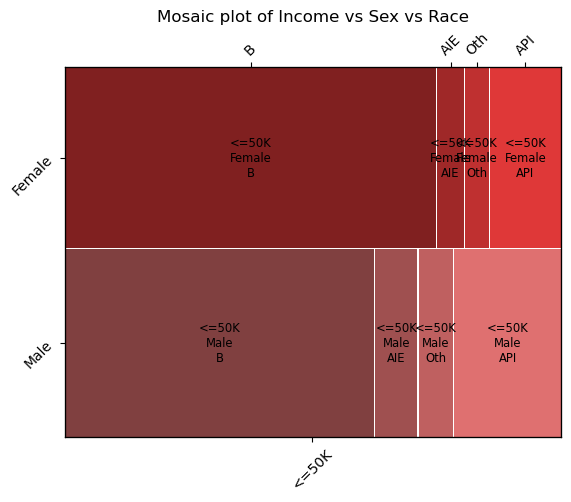

In [49]:
df_non_white = df_below[df['race']!='W']
mosaic(df_non_white, [ 'income', 'sex', 'race'], title='Mosaic plot of Income vs Sex vs Race', label_rotation=45)
plt.show()